In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima
from pandas.plotting import register_matplotlib_converters

In [17]:
import yfinance as yf

In [18]:
tickerSymbol = 'MSFT'

In [19]:
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [20]:
tickerDf = tickerDf[['Close']]
#see your data
tickerDf.head()

,Close
Date,
2014-12-31,40.439568
2015-01-02,40.709461
2015-01-05,40.335106
2015-01-06,39.743095
2015-01-07,40.248039


In [7]:
 cd C:\Users\Admin\Downloads\stock-price-main\stock-price-main

C:\Users\Admin\Downloads\stock-price-main\stock-price-main


In [21]:
stock_prices = tickerDf

In [22]:
stock_prices.head()

,Close
Date,
2014-12-31,40.439568
2015-01-02,40.709461
2015-01-05,40.335106
2015-01-06,39.743095
2015-01-07,40.248039


In [23]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2014-12-31 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1259 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [24]:
stock_prices.isnull().sum()

Close    0
dtype: int64

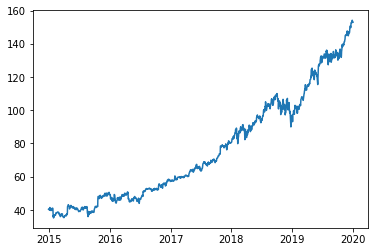

In [25]:
plt.plot(stock_prices)
plt.show()

Increasing trend
No seasonality


SMA

In [26]:
sma=stock_prices.rolling(window=30).mean()
smv=stock_prices.rolling(window=30).std()
print(sma[29:])
print(smv[29:])

                 Close
Date                  
2015-02-12   38.792393
2015-02-13   38.717521
2015-02-17   38.634238
2015-02-18   38.561971
2015-02-19   38.508562
...                ...
2019-12-24  147.099035
2019-12-26  147.490128
2019-12-27  147.882864
2019-12-30  148.207153
2019-12-31  148.473466

[1230 rows x 1 columns]
               Close
Date                
2015-02-12  2.042921
2015-02-13  2.021520
2015-02-17  1.987811
2015-02-18  1.963099
2015-02-19  1.951619
...              ...
2019-12-24  2.935386
2019-12-26  3.031640
2019-12-27  3.107675
2019-12-30  3.098388
2019-12-31  3.150859

[1230 rows x 1 columns]


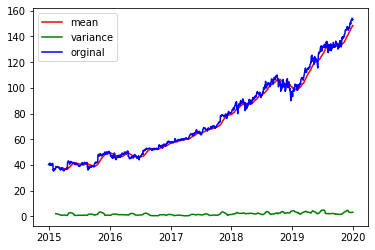

In [27]:
plt.plot(sma,color="red",label="mean")
plt.plot(smv,color="green",label="variance")
plt.plot(stock_prices,color="blue",label="orginal")
plt.legend()
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(stock_prices["Close"], autolag='AIC')
print(result)

(2.3348032042868487, 0.9989762458904171, 8, 1250, {'1%': -3.435592223709696, '5%': -2.8638549702604803, '10%': -2.56800251776}, 3794.1589370073134)


Mean not constant
variance almost constant
data is not stationary

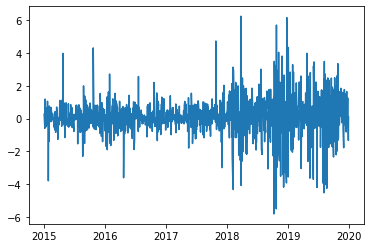

In [29]:
stock_prices1=stock_prices.diff(periods=1)
plt.plot(stock_prices1)

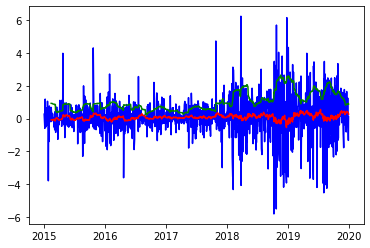

In [30]:
stock_prices1.dropna(inplace=True)
sma=stock_prices1.rolling(window=30).mean()
smv=stock_prices1.rolling(window=30).std()
plt.plot(stock_prices1,color="blue",label="orginal")
plt.plot(smv,color="green",label="variance")
plt.plot(sma,color="red",label="mean")

In [31]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(stock_prices1["Close"], autolag='AIC')
print(result)

(-15.053513748018187, 9.220560973557135e-28, 7, 1250, {'1%': -3.435592223709696, '5%': -2.8638549702604803, '10%': -2.56800251776}, 3794.5987302534736)


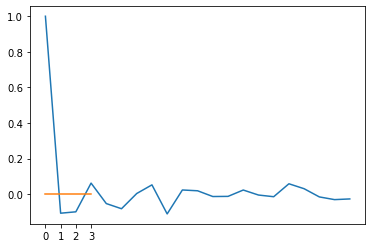

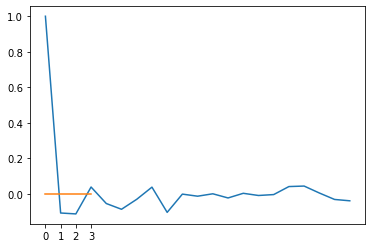

In [32]:
from statsmodels.tsa.stattools import acf, pacf
p=acf(stock_prices1,nlags=20)
plt.plot(p)
plt.xticks([0,1,2,3])
plt.plot([0,1,2,3],[0,0,0,0])
plt.show()
q=pacf(stock_prices1,nlags=20,method='ols')
plt.plot(q)
plt.xticks([0,1,2,3])
plt.plot([0,1,2,3],[0,0,0,0])
plt.show()


p=1

q=1

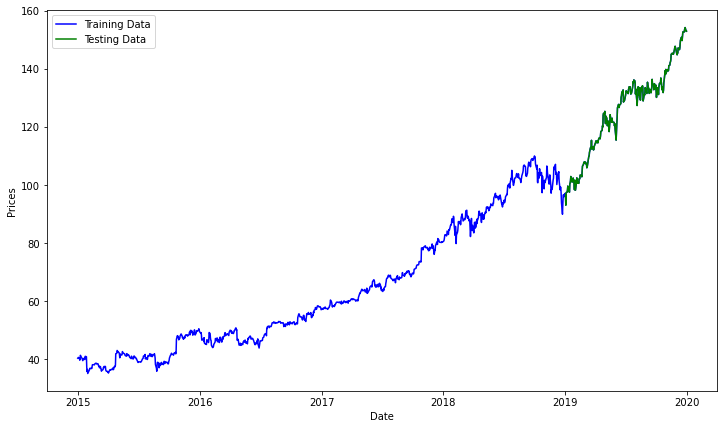

In [33]:
start=int(len(stock_prices)*0.8)
train, test = stock_prices[:start], stock_prices[start:]
plt.figure(figsize=(12,7))
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(stock_prices['Close'], 'blue', label='Training Data')
plt.plot(test['Close'], 'green', label='Testing Data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2919.581, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2908.543, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2905.761, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2920.577, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2899.487, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2901.740, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2901.553, Time=0.54 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2901.029, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2900.547, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2896.954, Time=0.88 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2898.389, Time=1.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2898.189, Time=1.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2902.101, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2903.723, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

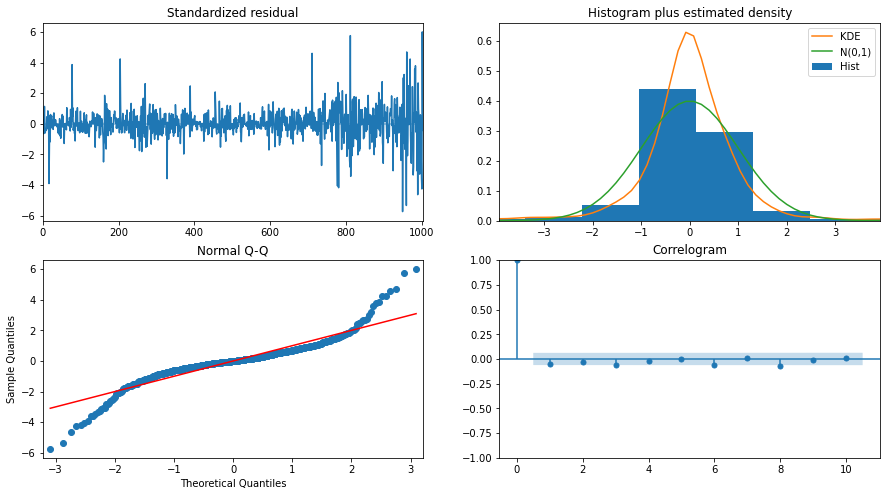

In [34]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [35]:
from statsmodels.tsa.arima.model import ARIMA


In [36]:
train_ar = train['Close'].values
test_ar = test['Close'].values
history = [x for x in train_ar]
predictions = []
for t in range(len(test_ar)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    history.append(test_ar[t])
    #print('predicted=%f, expected=%f' % (yhat, obs))

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,predictions)

0.009398139782354327

C:\Users\Admin\AppData\Local\Temp/ipykernel_11088/456782896.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(stock_prices['Close'], 'green', color='blue', label='Training Data')


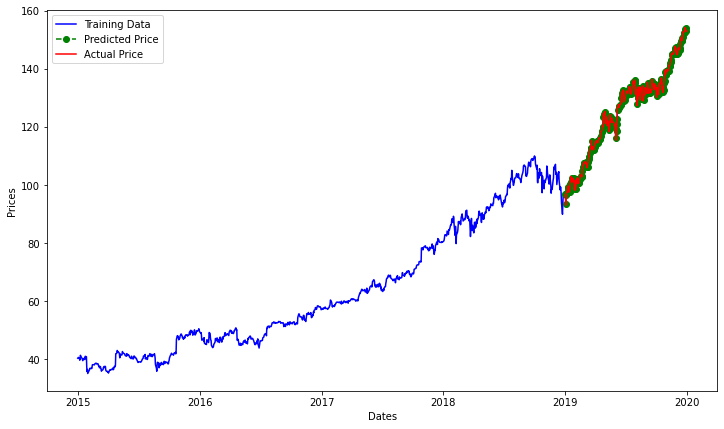

In [38]:
plt.figure(figsize=(12,7))
plt.plot(stock_prices['Close'], 'green', color='blue', label='Training Data')
plt.plot(test.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test.index, test['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()